<a href="https://colab.research.google.com/github/bobbyknit007/ML/blob/main/Classifier/KNN_Classifier_strokeDataSet_with_SMOTE_oversampling_fromVineetha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

### Problem statement
Perform EDA on the given dataset to predict possibility of 'stroke' based on the feature vectors given in the dataset

In [108]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let us import the data set called stroke into python environment

In [109]:
df = pd.read_csv('/content/stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [110]:
#looking at the top 5 rows
print('Below are the first 5 rows of the dataset')
df.head()

Below are the first 5 rows of the dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [111]:
#looking at bottom 5 rows
print('Below are the bottom 5 rows of the dataset')
df.tail()

Below are the bottom 5 rows of the dataset


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [112]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [113]:
#checking number of rows and columns
df.shape

(5110, 12)

* **id:** Unique identifier
* **gender:** Gender of the patient (Male, Female, Other)
* **age:** Age of the patient
* **hypertension:** **0** if the patient doesn't have hypertension, **1** if the patient has hypertension
* **heart_disease:** **0** if the patient doesn't have any heart diseases, **1** if the patient has a heart disease
* **ever_married:** **Yes** if the patient is married, **No** if the patient is not married
* **work_type:** Profession of the patient (children, Govt_job, Never_worked, Private, Self-employed)
* **Residence_type:** Residence category of the patient (Rural, Urban)
* **avg_glucose_level:** Average glucose level in blood of the patient
* **bmi:** Body Mass Index of the patient
* **smoking_status:** Smoking status of the patient (formerly smoked, never smoked, smokes, Unknown). **Unknown** in **smoking_status** means that the information is unavailable for this patient
* **stroke:** **1** if the patient had a stroke or **0** if not


In [114]:
#Creating a list of of all the ccolumns in the dataset
columns_list = list(df.columns)

#Getting unique values in each column
for i in columns_list:
    print('Number of unique values in column',i, 'is', df[i].nunique())



Number of unique values in column id is 5110
Number of unique values in column gender is 3
Number of unique values in column age is 104
Number of unique values in column hypertension is 2
Number of unique values in column heart_disease is 2
Number of unique values in column ever_married is 2
Number of unique values in column work_type is 5
Number of unique values in column Residence_type is 2
Number of unique values in column avg_glucose_level is 3979
Number of unique values in column bmi is 418
Number of unique values in column smoking_status is 4
Number of unique values in column stroke is 2


In [115]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

By the initial glance, we can understand that id will not play any role as it is just a unique number possibly given to each patient.
Hence, we can drop the id column.

In [116]:
#Dropping ID column and storing the 'id' dropped dataframe in df_v1
df_v1= df.drop('id', axis=1)

Updating list of columns after dropping id column

In [117]:
columns_list = list(df_v1.columns)

In [118]:
df_v1.head(100)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
95,Female,78.0,0,0,Yes,Private,Rural,235.63,32.3,never smoked,1
96,Female,70.0,0,0,Yes,Self-employed,Rural,76.34,24.4,formerly smoked,1
97,Male,58.0,0,1,Yes,Private,Rural,240.59,31.4,smokes,1
98,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1


In [119]:
#Checking for statistical summary

df_v1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [120]:
df_v1.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [121]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Insights**

1. Count of non-null values in column 'bmi' is 4909 which is less than the count in the other columns.
2. There is no data type conversion required.
3. Label encoding would be required for columns, 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

### Data Pre-processing

The process of converting raw data from the domains into a form that is more suitable for modeling is called data pre-processing.
The common tasks involved are as below,
1. Data Cleaning
2. Feature Selection
3. Data Transforms
4. Feature Engineering
5. Dimensionality reduction

#### 1. Data Cleaning

Raw data collected from domains would be incorrect and inoperable and possible reasons could be mistyping, corruption, duplication, missing valuess and so on. And the basic data cleaning has to exercised before exercising any further steps of data pre-processing.

Further Data pre-processing techniques like Feature selection, Data transforms, feature engineering and dimensionality reduction are necessitated by Exploratory Data Analysis.

We follow a WHH approach to achieve data cleaning.
* **W**- What to find?
* **H**- How to find?
* **H**- How to treat?


**1. What to find? : Missing Values**

Missing data refers to cells of a tabular dataset in which the data is not stored. These cells will not contain any real values.

**How to find missing values?**

In [122]:
df.size

61320

In [123]:
#Checking for null values in each column
df_v1.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [124]:
df_v1.isnull().sum()/len(df)

,0
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,0.039335
smoking_status,0.000000


In [125]:
df_v1.isnull().sum().to_frame().T

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,201,0,0


**How to treat missing values?**

Method 1: Dropping rows or columns.


In [126]:
#Dropping rows that contain missing values and storing in df_drop
df_drop = df_v1.dropna()

In [127]:
#validating drop action
df_drop.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [128]:
#df_drop.shape

Method 2: Imputation - filling missing values with mean or median or mode of the resspective column.


In [129]:
#method2: Imputation - filling missing values with mean or median of the resspective column

bmi_mean = round(df_v1['bmi'].mean(), 1)
#bmi_mean = (df_v1['bmi'].mean())

bmi_med = df_v1['bmi'].median()

In [130]:
print(bmi_mean)
print(bmi_med)

28.9
28.1


In [131]:
#Filling missing values with bmi_mean and storing new dataframe in df_imp
df_imp = df_v1.fillna(bmi_mean, axis=1)

In [132]:
df_imp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.9,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.2,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [133]:
#validating imputation action
df_imp.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [134]:
df.shape

(5110, 12)

**NOTE: We know that BMI - Body mass Index plays a major role in determining the possibility of stroke. Hereon, let's use the dataframe df_imp for exploration.**

**2. What to find? : Duplicate Values**

Values are considered to be duplicate when the entire row is found to be identical with any ther row and the same goes for columns as well.
Sometimes the datapoint duplication will be defined by only a few set of columns as well.

**How to find duplicated values?**

In [135]:
#duplicate rows
df_imp.duplicated().sum()

0

There are no duplicate values in the dataset.

However, it is not so straight forward to find out duplicate or redundant columns. A clear understanding of the dataset and the respective columns is required to determine column duplication. It is the pattern to be determined by the analyst.

**How to treat duplicated values?**

***df.drop_duplicates()*** is the function used to drop duplicate values. By default the function retains the first value.

**3. What to find? : Outliers**

An outlier is an observation that lies at an abnormal distance from other values in a random sample from a population.

**How to find outliers?**

Method 1: Box and whisker plots
![image.png](attachment:image.png)

Method 2: By the definition of how many standard deviations away from the mean.

***mean +/- n * Standard deviation***

where, **n** is the number of standard deviations which will have to be defined by a domain expert.


In [136]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5110 non-null   object
 1   age                5110 non-null   object
 2   hypertension       5110 non-null   object
 3   heart_disease      5110 non-null   object
 4   ever_married       5110 non-null   object
 5   work_type          5110 non-null   object
 6   Residence_type     5110 non-null   object
 7   avg_glucose_level  5110 non-null   object
 8   bmi                5110 non-null   object
 9   smoking_status     5110 non-null   object
 10  stroke             5110 non-null   object
dtypes: object(11)
memory usage: 439.3+ KB


The numerical features available in the dataset are 'age', 'hypertension', 'heart_disease', 'avg_glucose_level' and 'bmi'. However, the features 'hypertension', 'heart_disease' are necessarily encoded categorical features contaiining only 2 unique values '0' and '1'.

Hence, we will check for outliers only in columns 'age', 'avg_glucose_level' and 'bmi'.

Let me just put a box and whisker plot(Method 1) to understand outliers in the given dataset as we do not have any domain expert to define the 'n'(Method 2).

<Axes: xlabel='age'>

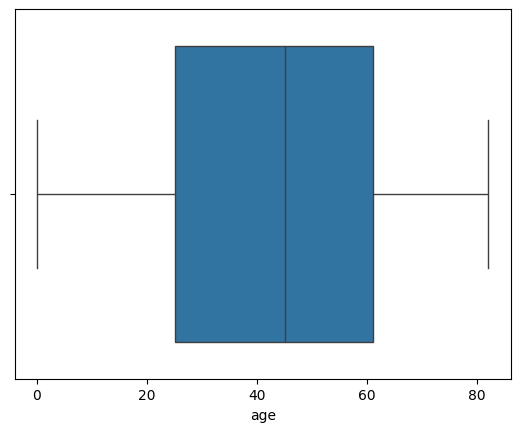

In [137]:
sns.boxplot(data=df_imp, x='age')

**Inference:**
There are no outliers in the age column.

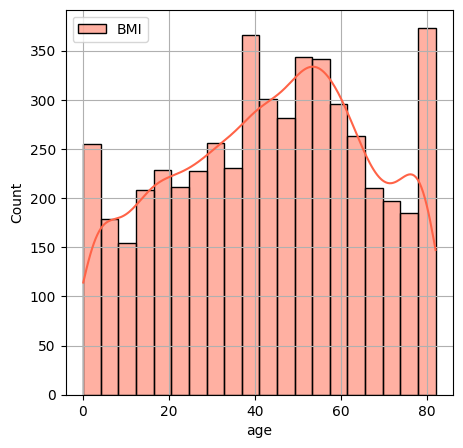

In [138]:
plt.figure(figsize=(5,5))
sns.histplot(df_imp['age'], color='tomato', label='BMI',kde=True)
plt.legend()
plt.grid()

<Axes: xlabel='avg_glucose_level'>

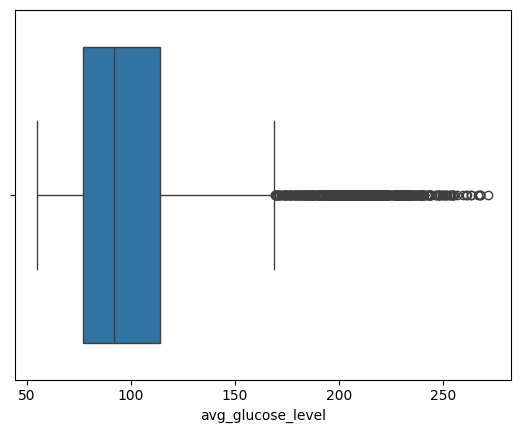

In [139]:
sns.boxplot(data=df_imp, x='avg_glucose_level')

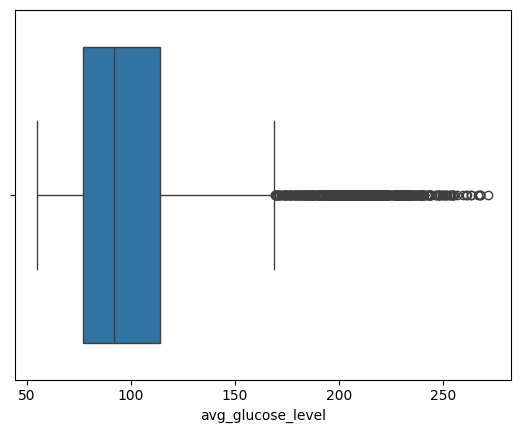

In [140]:
sns.boxplot(data=df_imp, x='avg_glucose_level')
plt.show()

There are outliers in the Average glucose level

<Axes: xlabel='bmi'>

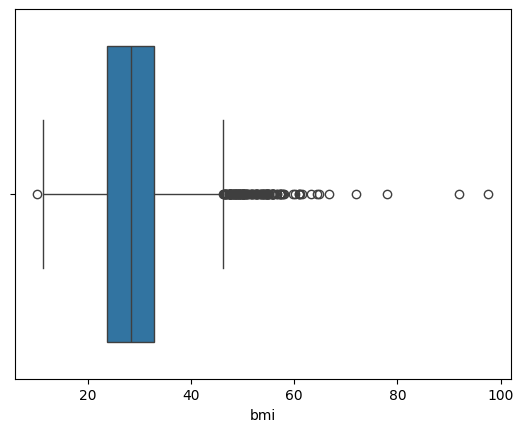

In [141]:
sns.boxplot(data=df_imp, x='bmi')

In [142]:
#age
#avg_glucose_level
#bmi

##### Let us analyse the target vector-'stroke' and see how many class labels are available

In [143]:
df_imp['stroke'].value_counts()

,count
stroke,
0,4861
1,249


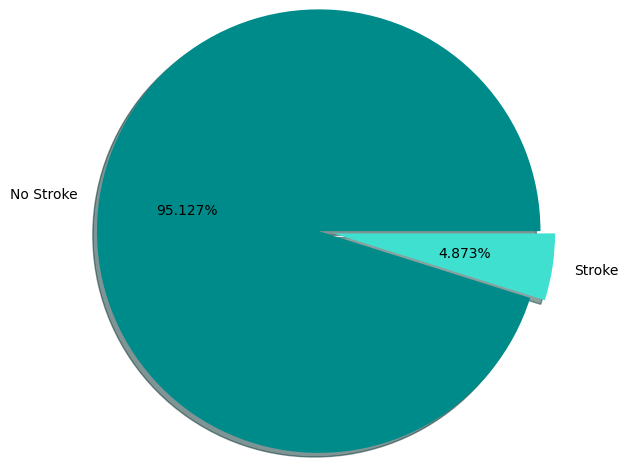

<Figure size 640x480 with 0 Axes>

In [144]:
df_grp = pd.DataFrame(df_imp.groupby('stroke')['stroke'].count())
df_grp
colors = ['darkcyan','turquoise']
labels=['No Stroke', 'Stroke']
plt.pie([4861,249], labels=labels,autopct='%.3f%%', radius=1.5, colors=colors, shadow=True, explode=[0,0.1])
plt.show()
fig = plt.gcf()
fig.set_facecolor('black')

From the Pie chart for the target vector 'stroke', we can observe that the percentage of those who did not have stroke is higher in coomparison to the percentage of those who had stroke.
i.e., Percentage of occurence of 'stroke' << Percentage of occurence of 'no stroke'

And this infers that the data set set is **largely imbalanced**.

Checking the histogram of each column

In [145]:
df_imp.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

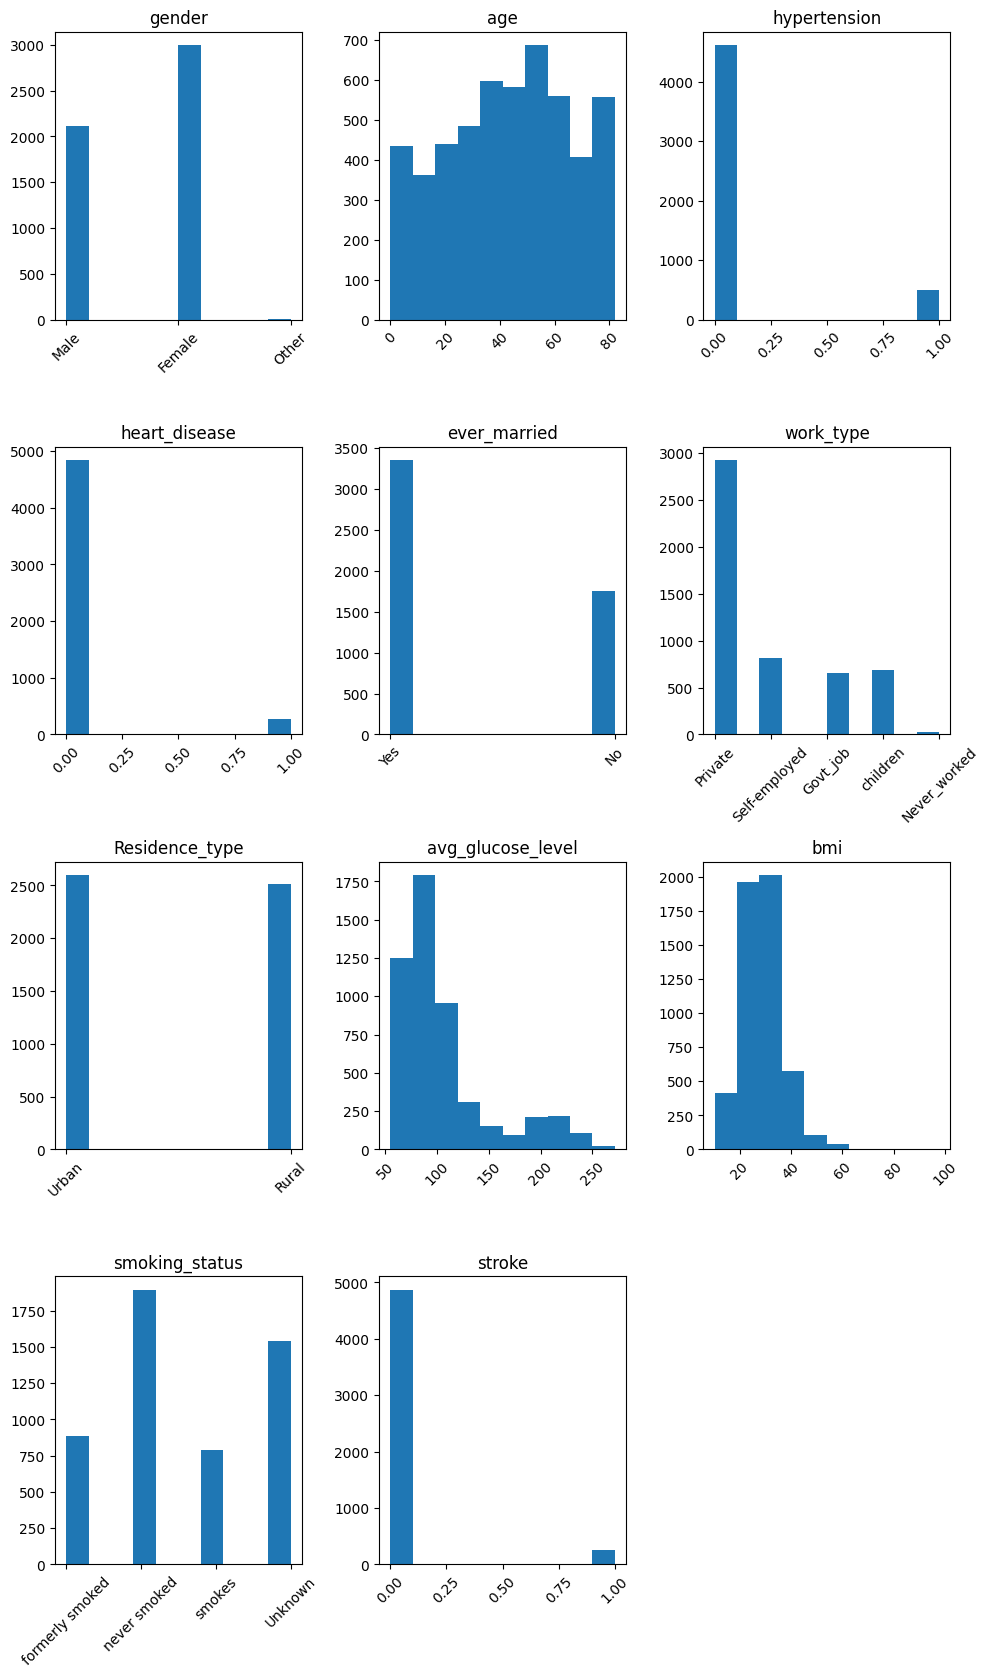

In [146]:
plt.figure(figsize=(10,20))
for i in range(len(columns_list)):
    plt.subplot(5,3,i+1)
    plt.title(columns_list[i])
    plt.xticks(rotation=45)
    plt.hist(df_imp[columns_list[i]])

plt.tight_layout()


1. Looking at the histogram of gender column looks like there are 3 different unique values. Count of 'Other' in gender column seems to be too low.
2. Avergae glucose level is right skewed
3. BMI column seems to be leptokurtic

In [147]:
#Unique values in column gender
df_imp['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [148]:
#checking the row where 'gender' column contaiins 'other'
df_imp[df_imp['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [149]:
#dropping row number-3116(where gender=Other)
df_imp = df_imp.drop(3116)

#### 1. Univariate Analysis

- Analysing one variable/feature/column at a time. Uni-One.
- Univariate analysis can be descriptive or inferential.
- We can use any univariate plots to demonstrate univariate analysis like histogram, PDF, CDF, BOX plot, violin plot, 1D-scatterplot...and so on.

<Axes: xlabel='age', ylabel='Probability'>

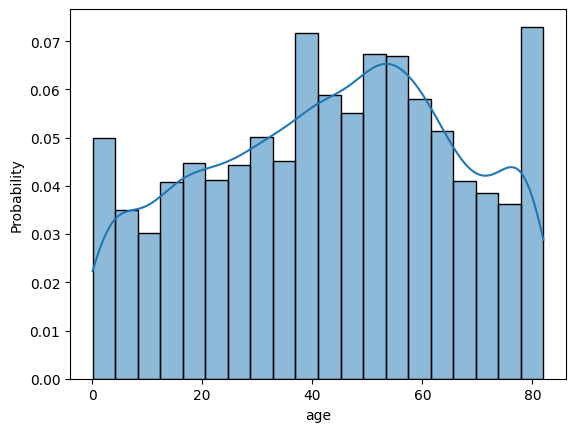

In [150]:
sns.histplot(data=df_imp,x='age',  kde=True,stat="probability", common_norm=False)


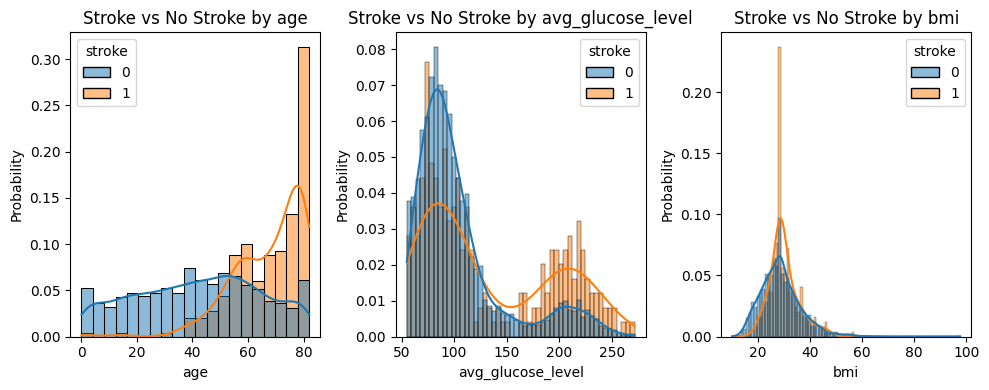

In [151]:
num_list = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(10,4))
for i in range(len(num_list)):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df_imp,x=num_list[i], hue='stroke', kde=True, stat="probability", common_norm=False)
    plt.title('Stroke vs No Stroke by {}'.format(num_list[i]))
plt.tight_layout()

Inference:
1. Age: When age is less than 40, chances of stroke are slim; When age is more than 50 chances of atroke is high;At the age of 70-80, chances of stroke is very high.
2. Glucose level: Chances of stroke is high if glucose level is more than 150.
        

In [152]:
df_imp.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

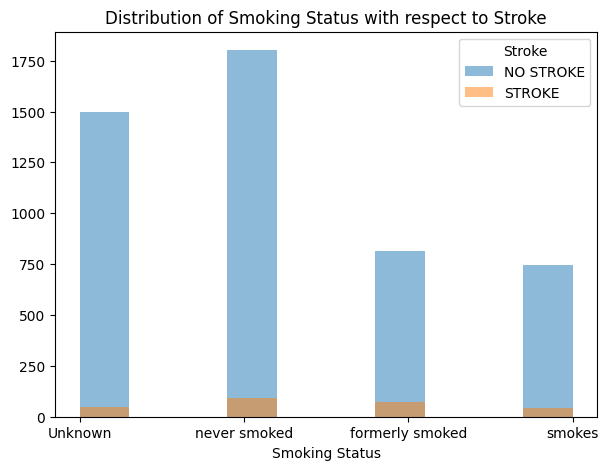

In [153]:
#Distribution of Smoking Status with respect to Stroke
plt.figure(figsize=(7, 5))
plt.hist("smoking_status", data = df_imp[df_imp["stroke"] ==0], alpha = 0.5, label = "NO STROKE")
plt.hist("smoking_status", data = df_imp[df_imp["stroke"] == 1], alpha = 0.5, label = "STROKE")
plt.title("Distribution of Smoking Status with respect to Stroke")
plt.xlabel("Smoking Status")
plt.legend(title = "Stroke")
plt.show()

In [154]:
obj_list = ['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

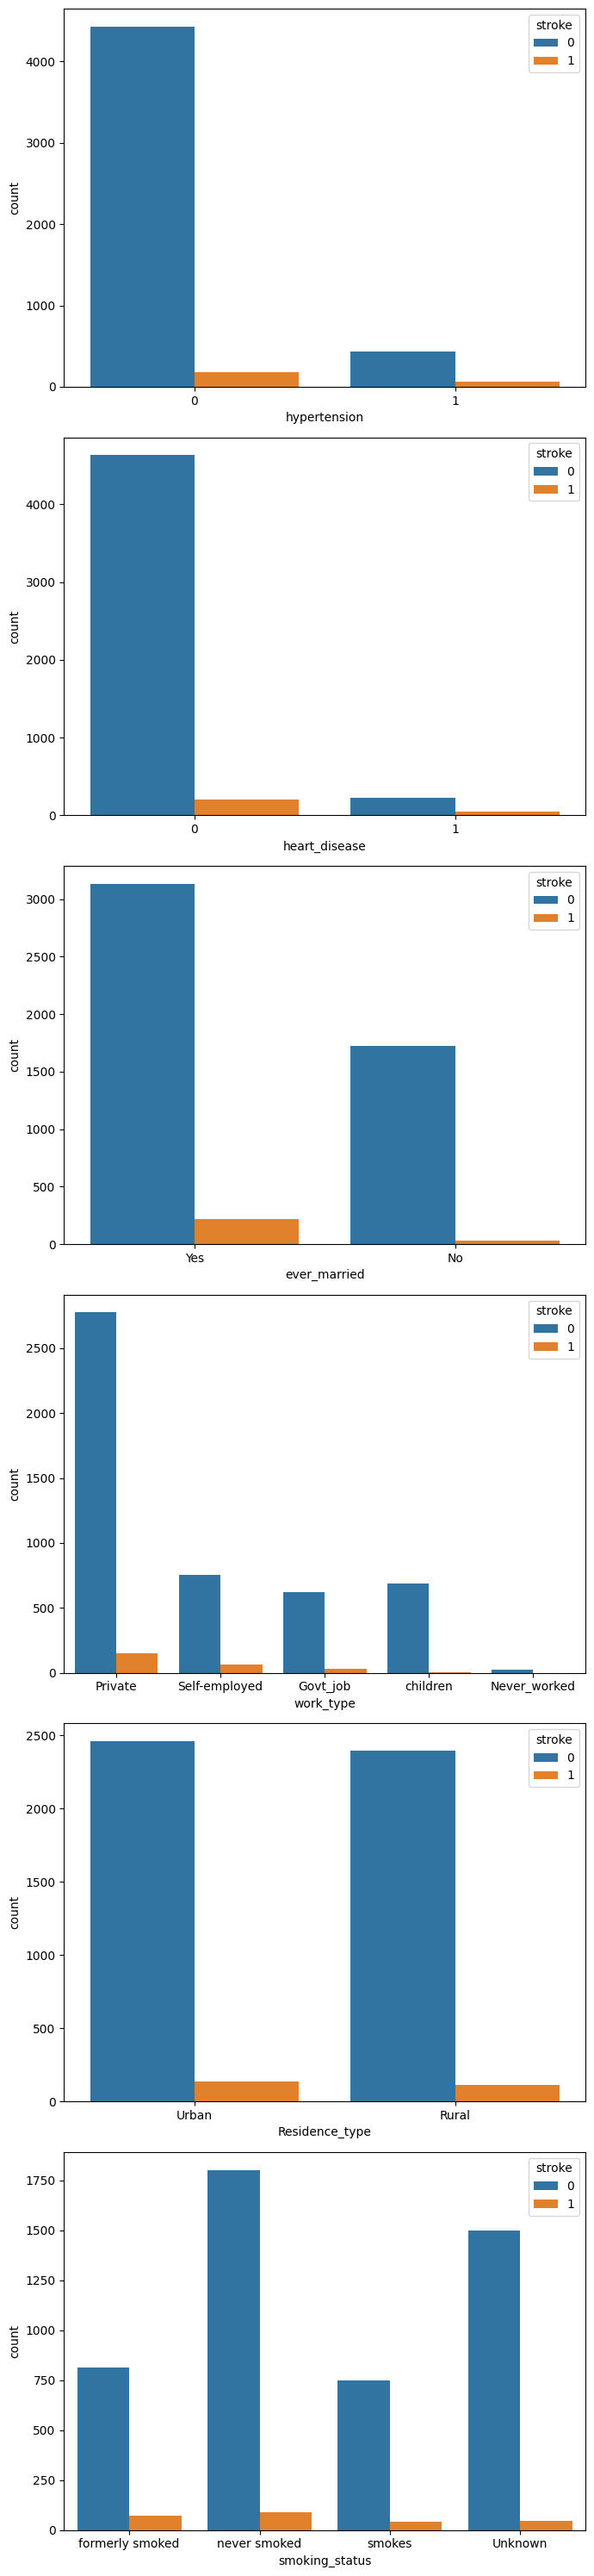

In [155]:
plt.figure(figsize=(7,30))
for i in range(len(obj_list)):
    plt.subplot(6,1,i+1)
    sns.countplot(data=df_imp, x=obj_list[i], hue='stroke')
plt.tight_layout()

#### 2. Bivariate Analysis

- Analysing two variable/feature/column at a time. Bi-Two.
- Bivariate analysis can be descriptive or inferential.
- We can use any bivariate plots to demonstrate univariate analysis like scatter plot, line plot, Box plot(SNS), Violin Plot(SNS)...etc

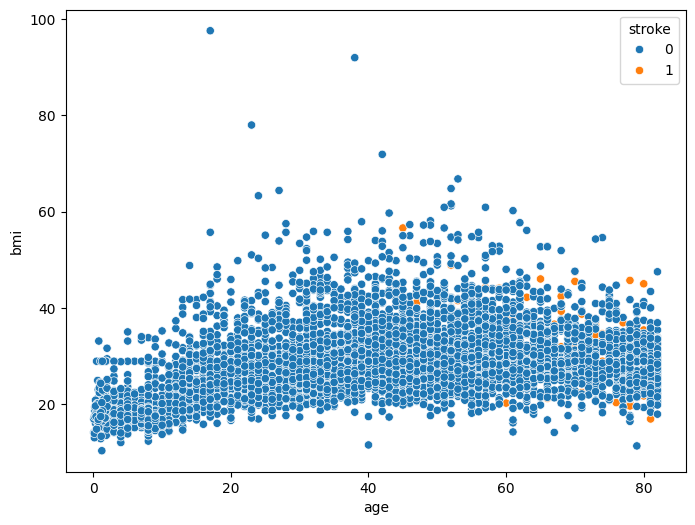

In [156]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_imp, x="age", y="bmi", hue='stroke')
plt.show()

<Figure size 6000x4000 with 0 Axes>

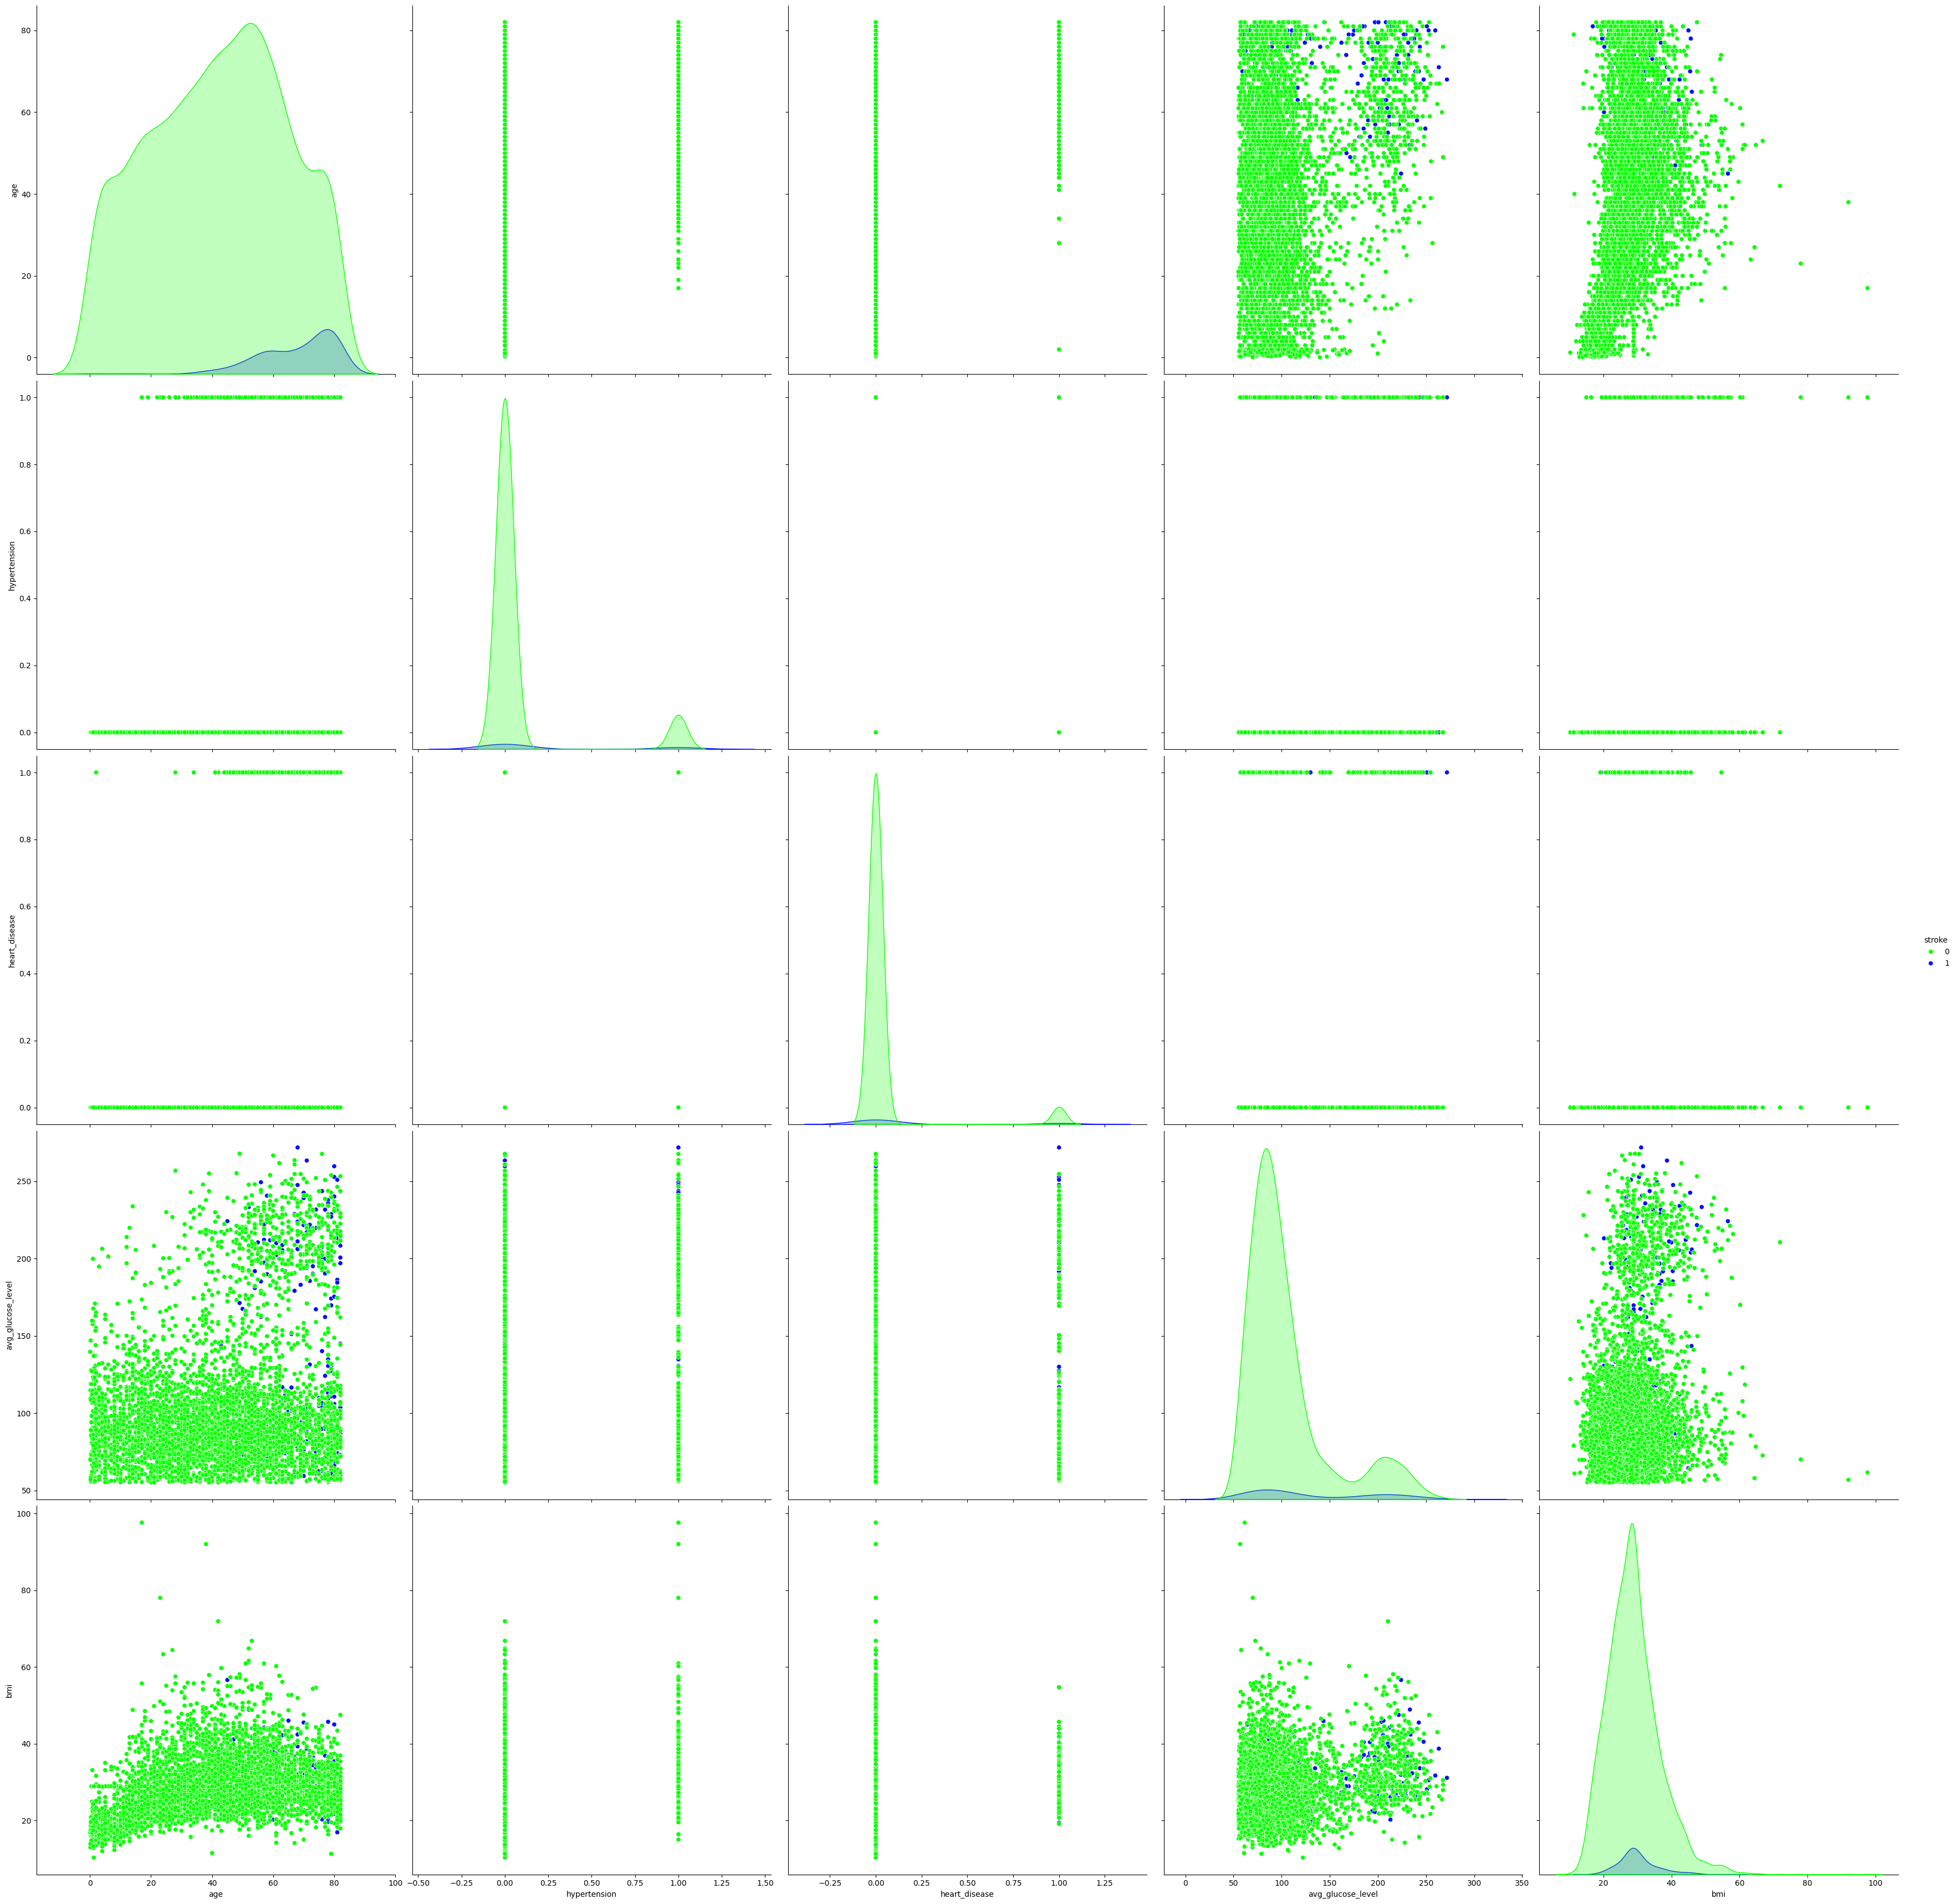

In [157]:
plt.figure(figsize=(60,40))
sns.pairplot(df_imp, hue='stroke', height=7, palette='hsv')
plt.savefig('D:\\Dataset\\pair_plot.png', format='png')

#### 3. Multivariate Analysis

- Analysing more than 2 variables/features/columns at a time.
- Bivariate analysis can be descriptive or inferential.
- We can use any multivariate plots to demonstrate univariate analysis like 3D scatter plot, Contour plots, heatmaps.

In [158]:
import plotly.express as px
fig = px.scatter_3d(df_imp, x='age', y='bmi', z='avg_glucose_level',
              color='stroke',color_discrete_sequence=px.colors.qualitative.Bold, width=1200, height=1200)
fig.show()

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [168]:
df.fillna(df['bmi'].mean(), inplace=True)

In [169]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender_code'] = le.fit_transform(df['gender'])
df['ever_married_code'] = le.fit_transform(df['ever_married'])
df['work_type_code'] = le.fit_transform(df['work_type'])
df['Residence_type_code'] = le.fit_transform(df['Residence_type'])
df['smoking_status_code'] = le.fit_transform(df['smoking_status'])

In [170]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_code', 'ever_married_code',
       'work_type_code', 'Residence_type_code', 'smoking_status_code'],
      dtype='object')

In [171]:
import numpy as np
num_col = df.select_dtypes(include=np.number)
num_col


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_code,ever_married_code,work_type_code,Residence_type_code,smoking_status_code
0,9046,67.0,0,1,228.69,36.600000,1,1,1,2,1,1
1,51676,61.0,0,0,202.21,28.893237,1,0,1,3,0,2
2,31112,80.0,0,1,105.92,32.500000,1,1,1,2,0,2
3,60182,49.0,0,0,171.23,34.400000,1,0,1,2,1,3
4,1665,79.0,1,0,174.12,24.000000,1,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,0,1,2,1,2
5106,44873,81.0,0,0,125.20,40.000000,0,0,1,3,1,2
5107,19723,35.0,0,0,82.99,30.600000,0,0,1,3,0,2
5108,37544,51.0,0,0,166.29,25.600000,0,1,1,2,0,1


In [172]:
from sklearn.model_selection import train_test_split
X = num_col.drop('stroke', axis =1)
Y = np.array(df['stroke']).reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [173]:
X_train.isna().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,0
gender_code,0
ever_married_code,0
work_type_code,0
Residence_type_code,0


In [174]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=4)

In [177]:
df[df['stroke'] == 1].size

4233

In [178]:
df[df['stroke'] == 0].size

82637

In [179]:
knn.score(X_train,Y_train)

0.9510763209393346

In [180]:
knn.score(X_test,Y_test)

0.9530332681017613

Text(50.722222222222214, 0.5, 'Predicted')

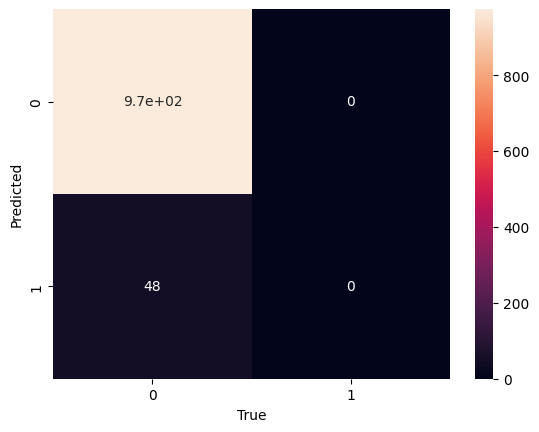

In [181]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')

In [182]:
from warnings import filterwarnings
filterwarnings('ignore')
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    score = knn.score(X_test,Y_test)
    if score>0.94:
        print(score,i)

0.9530332681017613 2
0.9500978473581213 3
0.9530332681017613 4
0.9530332681017613 5
0.9530332681017613 6
0.9530332681017613 7
0.9530332681017613 8
0.9530332681017613 9
0.9530332681017613 10
0.9530332681017613 11
0.9530332681017613 12
0.9530332681017613 13
0.9530332681017613 14
0.9530332681017613 15
0.9530332681017613 16
0.9530332681017613 17
0.9530332681017613 18
0.9530332681017613 19
0.9530332681017613 20
0.9530332681017613 21
0.9530332681017613 22
0.9530332681017613 23
0.9530332681017613 24
0.9530332681017613 25
0.9530332681017613 26
0.9530332681017613 27
0.9530332681017613 28
0.9530332681017613 29
0.9530332681017613 30
0.9530332681017613 31
0.9530332681017613 32
0.9530332681017613 33
0.9530332681017613 34
0.9530332681017613 35
0.9530332681017613 36
0.9530332681017613 37
0.9530332681017613 38
0.9530332681017613 39
0.9530332681017613 40
0.9530332681017613 41
0.9530332681017613 42
0.9530332681017613 43
0.9530332681017613 44
0.9530332681017613 45
0.9530332681017613 46
0.9530332681017613

In [190]:
pip install imblearn

In [194]:
from imblearn.over_sampling import SMOTE

In [195]:
smote =SMOTE()

In [196]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

In [198]:
X1 = np.arange(1, 301, 3).reshape(-1, 1)
y1= np.hstack((np.ones(90), np.zeros(10)))
# checking the distribution before SMOTE
print(pd.Series(y1).value_counts())

1.0    90
0.0    10
Name: count, dtype: int64


In [200]:
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X1, y1)

In [201]:
#Check distribution aftre SMOTE
print(pd.Series(y_resampled).value_counts())

1.0    90
0.0    90
Name: count, dtype: int64


In [202]:
print(X_resampled)

[[  1]
 [  4]
 [  7]
 [ 10]
 [ 13]
 [ 16]
 [ 19]
 [ 22]
 [ 25]
 [ 28]
 [ 31]
 [ 34]
 [ 37]
 [ 40]
 [ 43]
 [ 46]
 [ 49]
 [ 52]
 [ 55]
 [ 58]
 [ 61]
 [ 64]
 [ 67]
 [ 70]
 [ 73]
 [ 76]
 [ 79]
 [ 82]
 [ 85]
 [ 88]
 [ 91]
 [ 94]
 [ 97]
 [100]
 [103]
 [106]
 [109]
 [112]
 [115]
 [118]
 [121]
 [124]
 [127]
 [130]
 [133]
 [136]
 [139]
 [142]
 [145]
 [148]
 [151]
 [154]
 [157]
 [160]
 [163]
 [166]
 [169]
 [172]
 [175]
 [178]
 [181]
 [184]
 [187]
 [190]
 [193]
 [196]
 [199]
 [202]
 [205]
 [208]
 [211]
 [214]
 [217]
 [220]
 [223]
 [226]
 [229]
 [232]
 [235]
 [238]
 [241]
 [244]
 [247]
 [250]
 [253]
 [256]
 [259]
 [262]
 [265]
 [268]
 [271]
 [274]
 [277]
 [280]
 [283]
 [286]
 [289]
 [292]
 [295]
 [298]
 [292]
 [284]
 [277]
 [293]
 [276]
 [282]
 [296]
 [277]
 [284]
 [275]
 [276]
 [278]
 [292]
 [283]
 [278]
 [272]
 [283]
 [275]
 [278]
 [288]
 [292]
 [291]
 [273]
 [282]
 [283]
 [278]
 [283]
 [294]
 [280]
 [294]
 [288]
 [293]
 [291]
 [281]
 [278]
 [293]
 [288]
 [276]
 [289]
 [275]
 [281]
 [277]
 [292]

In [203]:
print(y_resampled)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [209]:
print(type(X_resampled))

<class 'numpy.ndarray'>


In [210]:
pd.DataFrame(X_resampled).duplicated().sum()

62

# Apply SMOTE on stroke data set to balance the imbalanced data set

In [276]:
from sklearn.model_selection import train_test_split
#X = num_col.drop('stroke', axis =1)
X = np.array(df['age']).reshape(-1,1)
Y = np.array(df['stroke']).reshape(-1,1)
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [277]:
Y.shape

(5110, 1)

In [278]:
pd.DataFrame(Y).value_counts()

,count
0,
0,4861
1,249


In [279]:
y_resampled.shape

(9722,)

In [280]:
pd.DataFrame(y_resampled).value_counts()

,count
0,
0,4861
1,4861


In [281]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [282]:
pd.DataFrame(Y_train).value_counts()

,count
0,
0,3901
1,3876


In [283]:
knn.score(X_train,Y_train)

0.8113668509708114

In [284]:
knn.score(X_test,Y_test)

0.8123393316195373

In [285]:
pd.DataFrame(Y_test).value_counts()

,count
0,
1,985
0,960


[[721 239]
 [126 859]]


Text(50.722222222222214, 0.5, 'Predicted')

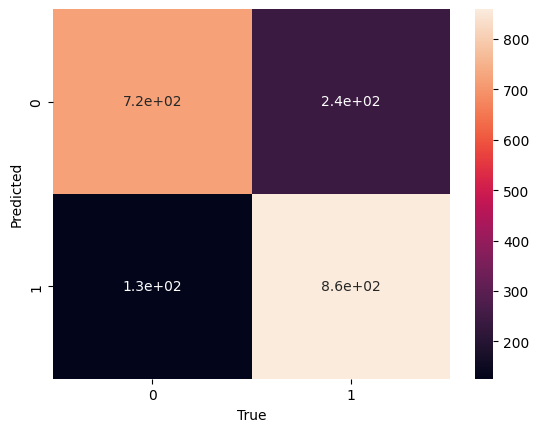

In [286]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')